In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv('balanced_policy.csv')
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,service_worker,37,high_school,single,unidentified,June,3,1045,3,unidentified,1
1,technical_specialist,36,college,married,mobile,January,29,313,1,unsuccessful,1
2,service_worker,30,college,single,mobile,August,21,1532,2,unidentified,1
3,executive,35,college,single,mobile,September,4,434,2,other_outcome,1
4,service_worker,40,high_school,divorced,mobile,February,2,531,1,successful,1


In [5]:
df.describe()

,age,call_day,call_duration,call_frequency,conversion_status
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.309699,15.470410,375.755058,2.476839,0.500000
std,11.969460,8.419517,350.803895,2.653990,0.500024
min,18.000000,1.000000,2.000000,1.000000,0.000000
25%,32.000000,8.000000,140.000000,1.000000,0.000000
50%,39.000000,15.000000,255.000000,2.000000,0.500000
75%,49.000000,21.000000,500.000000,3.000000,1.000000
max,95.000000,31.000000,3881.000000,43.000000,1.000000


In [6]:
df.call_duration.describe()

count    10578.000000
mean       375.755058
std        350.803895
min          2.000000
25%        140.000000
50%        255.000000
75%        500.000000
max       3881.000000
Name: call_duration, dtype: float64

In [7]:
df.conversion_status.value_counts()

conversion_status
1    5289
0    5289
Name: count, dtype: int64

In [8]:
df.occupation.value_counts()

occupation
executive               2405
manual_worker           1868
technical_specialist    1703
administrative_staff    1235
service_worker           856
retired_worker           760
jobless                  375
independent_worker       370
student                  356
business_owner           335
domestic_worker          253
unidentified              62
Name: count, dtype: int64

In [10]:
pd.crosstab(index=df["occupation"], columns = df["conversion_status"])

conversion_status,0,1
occupation,,
administrative_staff,604,631
business_owner,212,123
domestic_worker,144,109
executive,1104,1301
independent_worker,183,187
jobless,173,202
manual_worker,1160,708
retired_worker,244,516
service_worker,487,369


In [11]:
df["Age Group"] = pd.cut(df["age"], bins=5, labels=["18-30", "31-55", "55-70", "70-90", "90-More"])

In [12]:
df.groupby('occupation')['Age Group'].value_counts()

occupation            Age Group
administrative_staff  31-55         577
                      18-30         415
                      55-70         239
                      70-90           4
                      90-More         0
business_owner        31-55         173
                      55-70         101
                      18-30          58
                      70-90           2
                      90-More         1
domestic_worker       31-55         109
                      55-70          98
                      18-30          31
                      70-90          11
                      90-More         4
executive             31-55        1144
                      18-30         725
                      55-70         519
                      70-90          17
                      90-More         0
independent_worker    31-55         169
                      18-30         129
                      55-70          66
                      70-90           6
        

In [13]:
pd.crosstab(index=df["occupation"], columns = df["Age Group"])

Age Group,18-30,31-55,55-70,70-90,90-More
occupation,,,,,
administrative_staff,415,577,239,4,0
business_owner,58,173,101,2,1
domestic_worker,31,109,98,11,4
executive,725,1144,519,17,0
independent_worker,129,169,66,6,0
jobless,103,176,93,3,0
manual_worker,550,967,351,0,0
retired_worker,1,18,394,291,56
service_worker,317,399,140,0,0


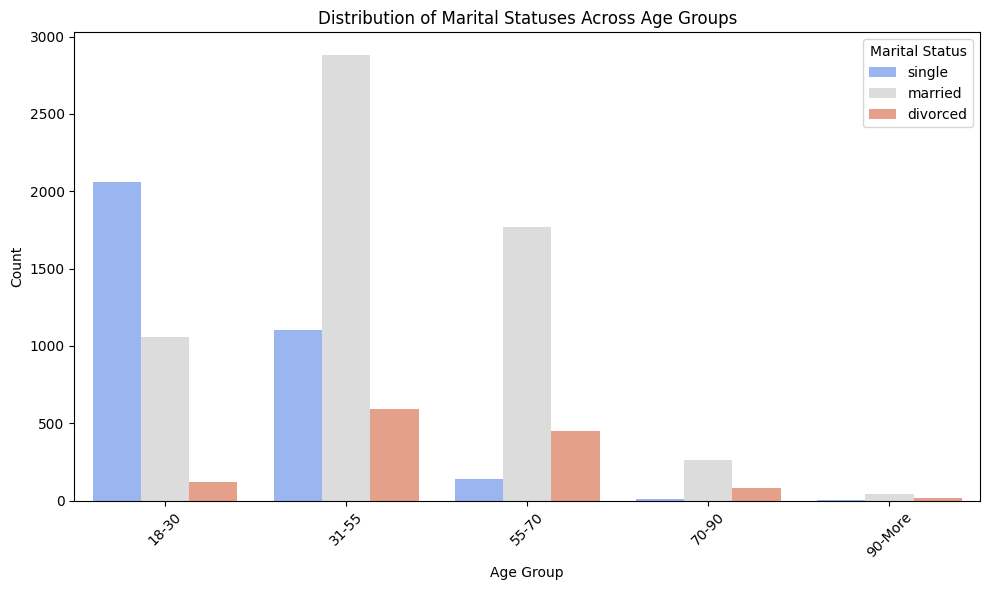

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='marital_status', data=df, palette='coolwarm')
plt.title('Distribution of Marital Statuses Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

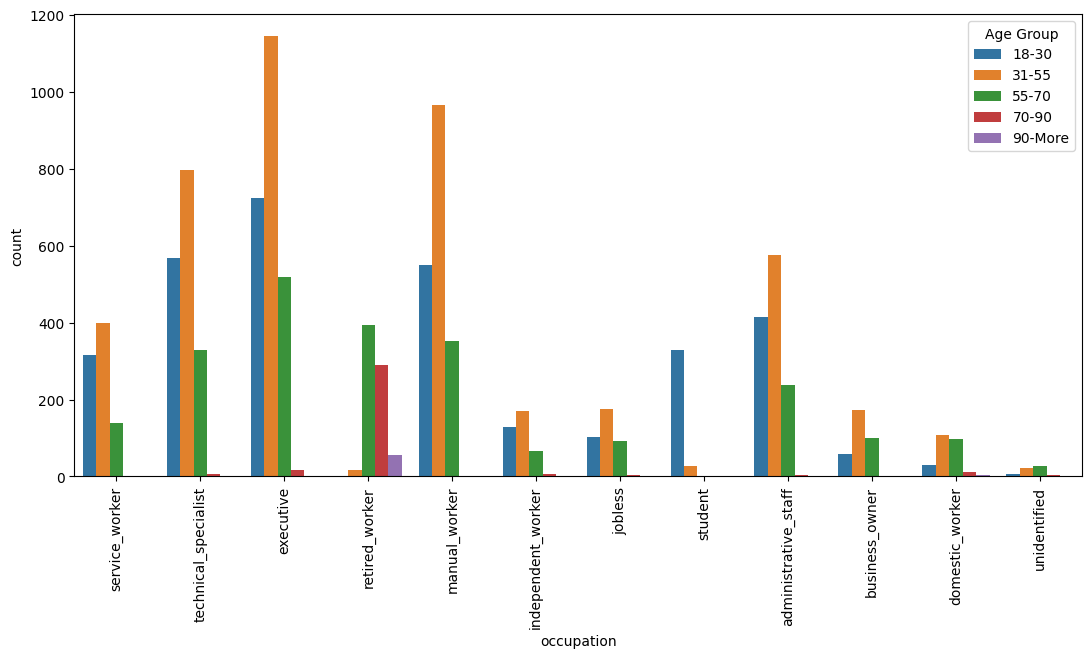

In [15]:
#sns.barplot(x=occupation.index, y=Age Group.values, hue=occupation.index)
plt.figure(figsize=(13,6))
sns.countplot(df,x='occupation', hue='Age Group')
plt.xticks(rotation=90)
plt.show()

In [16]:
df = df.drop(columns='Age Group')

In [17]:
pd.crosstab(index=df["education_level"], columns = df["conversion_status"])

conversion_status,0,1
education_level,,
college,1546,1996
elementary_school,821,591
high_school,2698,2450
unidentified,224,252


<Axes: xlabel='conversion_status', ylabel='count'>

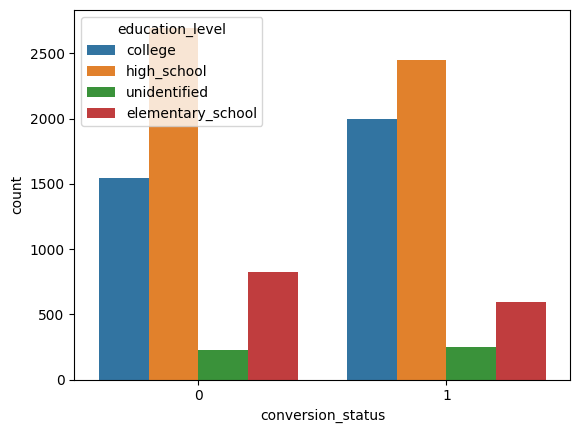

In [18]:
sns.countplot(df, x='conversion_status',hue='education_level' )

In [19]:
pd.crosstab(index=df['marital_status'], columns=df['communication_channel'])

communication_channel,landline,mobile,unidentified
marital_status,,,
divorced,84,870,304
married,486,4256,1271
single,140,2563,604


<Axes: xlabel='marital_status', ylabel='count'>

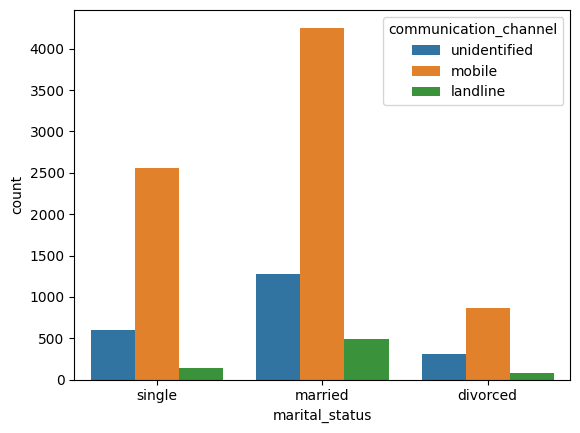

In [20]:
sns.countplot(df, x='marital_status', hue='communication_channel')

In [21]:
np.round(pd.pivot_table(df,index='call_month', columns='call_day', values='call_duration', fill_value=0)).T

call_month,April,August,December,February,January,July,June,March,May,November,October,September
call_day,,,,,,,,,,,,
1,402.0,0.0,0.0,371.0,0.0,304.0,341.0,0.0,0.0,0.0,230.0,346.0
2,722.0,343.0,357.0,379.0,0.0,330.0,319.0,363.0,0.0,132.0,396.0,425.0
3,407.0,350.0,256.0,340.0,0.0,332.0,382.0,284.0,0.0,342.0,0.0,321.0
4,0.0,349.0,432.0,415.0,0.0,544.0,347.0,293.0,418.0,301.0,12.0,477.0
5,398.0,464.0,0.0,418.0,0.0,120.0,374.0,225.0,326.0,345.0,0.0,13.0
6,442.0,490.0,0.0,352.0,78.0,314.0,390.0,210.0,398.0,308.0,462.0,279.0
7,333.0,318.0,425.0,0.0,147.0,390.0,302.0,0.0,374.0,0.0,257.0,381.0
8,452.0,370.0,0.0,331.0,244.0,403.0,253.0,285.0,369.0,280.0,268.0,361.0
9,361.0,229.0,401.0,289.0,0.0,404.0,387.0,282.0,323.0,312.0,686.0,371.0


In [22]:
pd.crosstab( index=df['call_month'], columns=df['call_day'], values=df['call_duration'], aggfunc='sum').T

call_month,April,August,December,February,January,July,June,March,May,November,October,September
call_day,,,,,,,,,,,,
1,6029.0,NaN,NaN,1854.0,NaN,6394.0,16389.0,NaN,NaN,NaN,3445.0,6926.0
2,7225.0,2399.0,1428.0,36351.0,NaN,10569.0,37315.0,9808.0,NaN,1187.0,1585.0,5521.0
3,5293.0,4547.0,2559.0,28861.0,NaN,8621.0,42778.0,5963.0,NaN,5807.0,NaN,5774.0
4,NaN,23749.0,3889.0,40248.0,NaN,6533.0,30560.0,2639.0,36328.0,1807.0,12.0,5244.0
5,5566.0,36681.0,NaN,35559.0,NaN,479.0,40062.0,5183.0,44380.0,2072.0,NaN,13.0
6,11938.0,35268.0,NaN,17602.0,78.0,2516.0,26141.0,1260.0,56852.0,1849.0,6937.0,4188.0
7,5665.0,25458.0,3825.0,NaN,294.0,33528.0,302.0,NaN,66627.0,NaN,1797.0,6479.0
8,18090.0,22200.0,NaN,3973.0,488.0,37474.0,3289.0,2564.0,48383.0,1959.0,4830.0,9760.0
9,8295.0,1833.0,5217.0,16162.0,NaN,28307.0,25147.0,5077.0,24862.0,5922.0,1372.0,10389.0


In [23]:
pd.crosstab(index=df['conversion_status'], columns=df['previous_campaign_outcome'])

previous_campaign_outcome,other_outcome,successful,unidentified,unsuccessful
conversion_status,,,,
0,217,99,4407,566
1,307,978,3386,618


<Axes: xlabel='conversion_status', ylabel='count'>

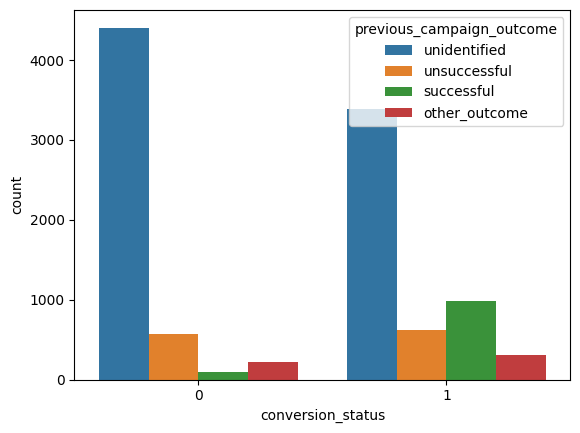

In [24]:
sns.countplot(df,x='conversion_status', hue='previous_campaign_outcome')

In [25]:
df.occupation.value_counts() ## pd.get_dummies

occupation
executive               2405
manual_worker           1868
technical_specialist    1703
administrative_staff    1235
service_worker           856
retired_worker           760
jobless                  375
independent_worker       370
student                  356
business_owner           335
domestic_worker          253
unidentified              62
Name: count, dtype: int64

In [26]:
occ = pd.get_dummies(df,columns=['occupation'],dtype='int', drop_first=True)

In [27]:
df = pd.concat([df['occupation'], occ], axis=1 )

In [28]:
df.drop('occupation', axis=1, inplace=True)

# Ordinal Encoding

In [32]:
from sklearn.preprocessing import OrdinalEncoder

In [33]:
enc = OrdinalEncoder()
df['education_level'] = enc.fit_transform(df[["education_level"]])

In [34]:
df.education_level.value_counts() # ordinal Encoder # Lambda

education_level
2.0    5148
0.0    3542
1.0    1412
3.0     476
Name: count, dtype: int64

In [35]:
df.marital_status.value_counts() #lambda

marital_status
married     6013
single      3307
divorced    1258
Name: count, dtype: int64

In [36]:
df['marital_status']=list(map(lambda x: 0 if x=='married' else(1 if x=='single' else 2), df['marital_status']))

In [37]:
df.communication_channel.value_counts() #Lambda

communication_channel
mobile          7689
unidentified    2179
landline         710
Name: count, dtype: int64

In [39]:
df.call_month.value_counts() # label


call_month
May          2643
July         1466
August       1367
June         1179
April         906
November      880
February      739
October       389
January       313
September     312
March         270
December      114
Name: count, dtype: int64

# Label Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
model = LabelEncoder()

In [42]:
model.fit_transform(df['call_month'])

array([6, 4, 1, ..., 8, 6, 8])

In [43]:
df['call_month']= model.fit_transform(df['call_month'])
df['call_month'].unique()

array([ 6,  4,  1, 11,  3,  5,  8,  2,  9,  7,  0, 10])

In [44]:
df.previous_campaign_outcome.value_counts() #label

previous_campaign_outcome
unidentified     7793
unsuccessful     1184
successful       1077
other_outcome     524
Name: count, dtype: int64

In [45]:
model.fit_transform(df['previous_campaign_outcome'])


array([2, 3, 2, ..., 2, 2, 1])

In [46]:
df['previous_campaign_outcome']

0         unidentified
1         unsuccessful
2         unidentified
3        other_outcome
4           successful
             ...      
10573     unidentified
10574     unidentified
10575     unidentified
10576     unidentified
10577       successful
Name: previous_campaign_outcome, Length: 10578, dtype: object

In [47]:
df['previous_campaign_outcome'] = model.fit_transform(df['previous_campaign_outcome'])

In [48]:
X = df.drop('conversion_status', axis=1)
y = df['conversion_status']

# OneHotEncoding

In [50]:
df=pd.read_csv("balanced_policy.csv")
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,service_worker,37,high_school,single,unidentified,June,3,1045,3,unidentified,1
1,technical_specialist,36,college,married,mobile,January,29,313,1,unsuccessful,1
2,service_worker,30,college,single,mobile,August,21,1532,2,unidentified,1
3,executive,35,college,single,mobile,September,4,434,2,other_outcome,1
4,service_worker,40,high_school,divorced,mobile,February,2,531,1,successful,1
...,...,...,...,...,...,...,...,...,...,...,...
10573,jobless,25,elementary_school,single,mobile,April,12,176,3,unidentified,1
10574,service_worker,47,high_school,married,unidentified,June,3,87,1,unidentified,0
10575,administrative_staff,28,high_school,divorced,unidentified,May,8,442,2,unidentified,1
10576,administrative_staff,27,high_school,single,mobile,June,16,66,1,unidentified,0


In [51]:
df['conversion_status'].value_counts()

conversion_status
1    5289
0    5289
Name: count, dtype: int64

In [52]:
df['conversion_status'].value_counts()

conversion_status
1    5289
0    5289
Name: count, dtype: int64

# Train Test splite

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=98)

In [55]:
X_train.shape

(7933, 20)

In [56]:
X_test.shape

(2645, 20)

# Decision Tree

In [58]:
import pandas as pd
import numpy as np

# data visualization library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'
df=pd.read_csv("balanced_policy.csv")
df

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,service_worker,37,high_school,single,unidentified,June,3,1045,3,unidentified,1
1,technical_specialist,36,college,married,mobile,January,29,313,1,unsuccessful,1
2,service_worker,30,college,single,mobile,August,21,1532,2,unidentified,1
3,executive,35,college,single,mobile,September,4,434,2,other_outcome,1
4,service_worker,40,high_school,divorced,mobile,February,2,531,1,successful,1
...,...,...,...,...,...,...,...,...,...,...,...
10573,jobless,25,elementary_school,single,mobile,April,12,176,3,unidentified,1
10574,service_worker,47,high_school,married,unidentified,June,3,87,1,unidentified,0
10575,administrative_staff,28,high_school,divorced,unidentified,May,8,442,2,unidentified,1
10576,administrative_staff,27,high_school,single,mobile,June,16,66,1,unidentified,0


In [59]:
df.isnull().sum().sum()

np.int64(0)

In [60]:
df['previous_campaign_outcome'].unique()

array(['unidentified', 'unsuccessful', 'other_outcome', 'successful'],
      dtype=object)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   occupation                 10578 non-null  object
 1   age                        10578 non-null  int64 
 2   education_level            10578 non-null  object
 3   marital_status             10578 non-null  object
 4   communication_channel      10578 non-null  object
 5   call_month                 10578 non-null  object
 6   call_day                   10578 non-null  int64 
 7   call_duration              10578 non-null  int64 
 8   call_frequency             10578 non-null  int64 
 9   previous_campaign_outcome  10578 non-null  object
 10  conversion_status          10578 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 909.2+ KB


In [62]:
df.shape

(10578, 11)

<Axes: xlabel='previous_campaign_outcome', ylabel='Count'>

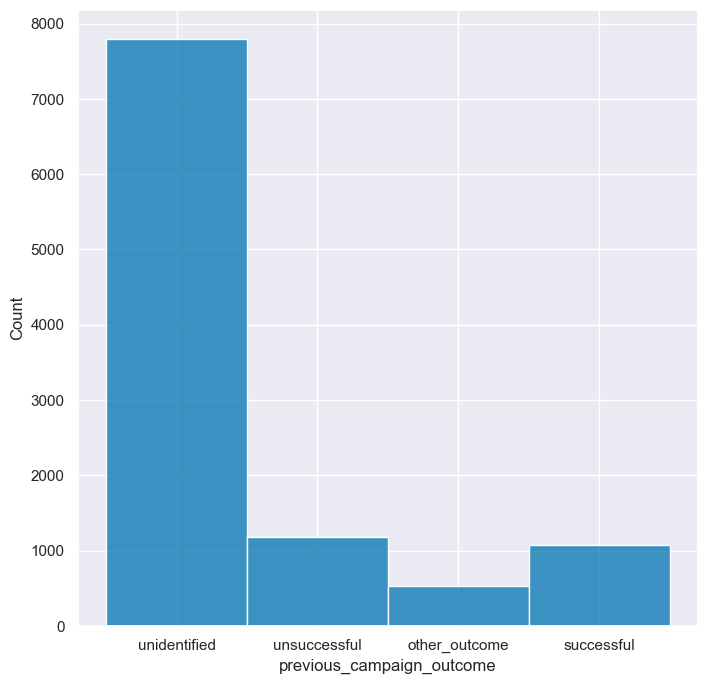

In [63]:
sns.histplot(df['previous_campaign_outcome'])

In [64]:
X = df.drop(['previous_campaign_outcome'],axis=1)
y = df['previous_campaign_outcome']

In [65]:
X = pd.get_dummies(X)

# Encoding

In [66]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[2 3 2 ... 2 2 1]


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [68]:
from sklearn.metrics import accuracy_score

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assume X_train, X_test, y_train, y_test are your training and testing data
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Assume 'X_train' and 'X_test' are DataFrames with categorical variables
# Perform one-hot encoding on categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Instantiate the DecisionTreeClassifier with the desired parameters
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model
clf_gini.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred = clf_gini.predict(X_test_encoded)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7296786389413988


[Text(0.5416666666666666, 0.875, 'x[26] <= 0.5\ngini = 0.43\nsamples = 8462\nvalue = [418, 846, 6248, 950]'),
 Text(0.3333333333333333, 0.625, 'x[4] <= 0.5\ngini = 0.509\nsamples = 6704\nvalue = [411.0, 842.0, 4506.0, 945.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[32] <= 0.5\ngini = 0.391\nsamples = 2946\nvalue = [172, 81, 2248, 445]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.465\nsamples = 2283\nvalue = [170, 77, 1601, 435]'),
 Text(0.25, 0.125, 'gini = 0.047\nsamples = 663\nvalue = [2, 4, 647, 10]'),
 Text(0.5, 0.375, 'x[2] <= 526.5\ngini = 0.576\nsamples = 3758\nvalue = [239.0, 761.0, 2258.0, 500.0]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.632\nsamples = 2403\nvalue = [169.0, 630.0, 1258.0, 346.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.43\nsamples = 1355\nvalue = [70, 131, 1000, 154]'),
 Text(0.75, 0.625, 'x[2] <= 4.5\ngini = 0.018\nsamples = 1758\nvalue = [7.0, 4.0, 1742.0, 5.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.66

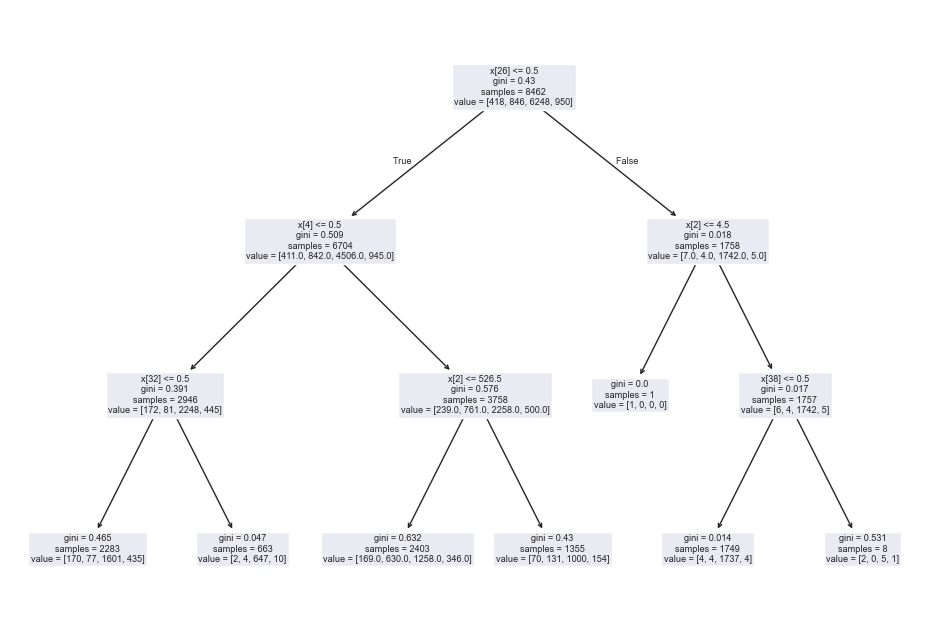

In [71]:
plt.figure(figsize=(12,8))

tree.plot_tree(clf_gini.fit(X_train, y_train))

In [72]:
#Predict the values
y_pred_gini = clf_gini.predict(X_test)

In [73]:
#Predict the value using X train for accuracy comparision
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([2, 2, 2, ..., 2, 2, 2])

In [74]:
#Determine the accuracy score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))
#Accuracy Score for training set
accuracy_Decision_tree=accuracy_score(y_test, y_pred_gini)

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))


Model accuracy score with criterion gini index: 0.7297
Training-set accuracy score: 0.7385


In [75]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred_gini are already defined
cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[   0    0  106    0]
 [   0    0  231    0]
 [   1    0 1544    0]
 [   0    0  234    0]]


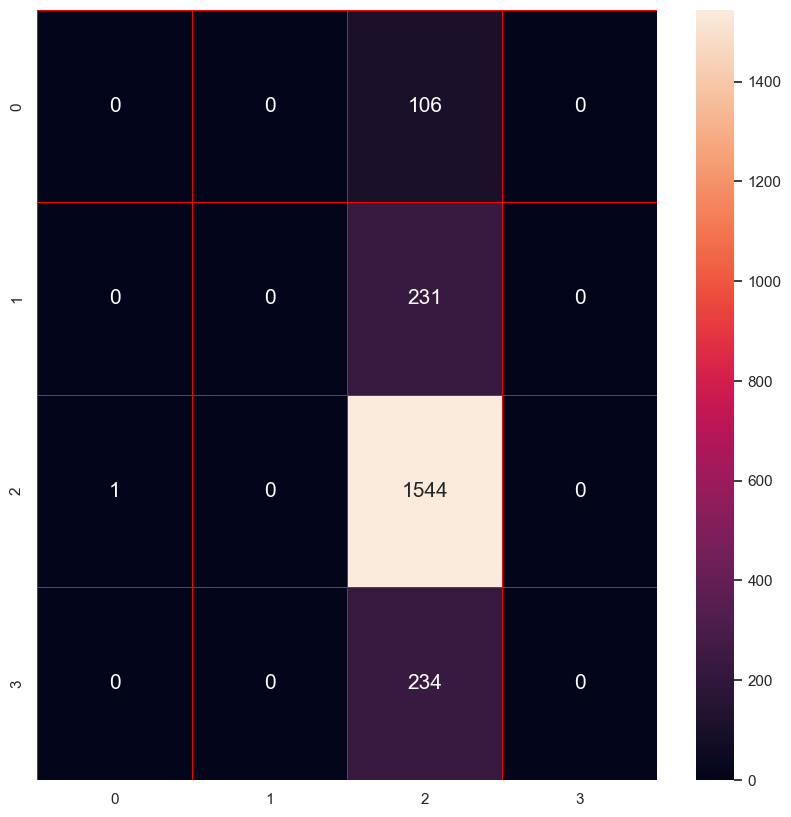

<Figure size 800x800 with 0 Axes>

In [76]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

# Random Forest and Decsion Tree Accuracy

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, r2_score, recall_score, accuracy_score

# Assuming X contains features and y contains the target variable

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Decision Tree and Random Forest models
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()

decision_tree_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)

# Step 4: Make predictions
decision_tree_predictions = decision_tree_classifier.predict(X_test)
random_forest_predictions = random_forest_classifier.predict(X_test)

# Step 5: Calculate metrics
decision_tree_f1 = f1_score(y_test, decision_tree_predictions, average='weighted')
random_forest_f1 = f1_score(y_test, random_forest_predictions, average='weighted')

decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

decision_tree_recall = recall_score(y_test, decision_tree_predictions, average='weighted')
random_forest_recall = recall_score(y_test, random_forest_predictions, average='weighted')

decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

# Print the results
print("Decision Tree Metrics:")
print("F1 Score:", decision_tree_f1)
print("R2 Score:", decision_tree_r2)
print("Recall:", decision_tree_recall)
print("Accuracy:", decision_tree_accuracy)

print("\nRandom Forest Metrics:")
print("F1 Score:", random_forest_f1)
print("R2 Score:", random_forest_r2)
print("Recall:", random_forest_recall)
print("Accuracy:", random_forest_accuracy)


Decision Tree Metrics:
F1 Score: 0.6305864997230617
R2 Score: -0.9780585975908049
Recall: 0.6342155009451795
Accuracy: 0.6342155009451795

Random Forest Metrics:
F1 Score: 0.6622103409571753
R2 Score: -0.1774971732348256
Recall: 0.7329867674858223
Accuracy: 0.7329867674858223


In [87]:
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=98)

y_train
X_train

,age,call_day,call_duration,call_frequency,conversion_status,occupation_administrative_staff,occupation_business_owner,occupation_domestic_worker,occupation_executive,occupation_independent_worker,...,call_month_December,call_month_February,call_month_January,call_month_July,call_month_June,call_month_March,call_month_May,call_month_November,call_month_October,call_month_September
7116,33,6,112,2,0,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8294,30,15,808,3,1,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
10179,35,29,643,2,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8842,61,22,269,1,1,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2766,41,12,147,2,1,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,35,23,141,2,0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3519,32,28,108,7,0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3252,29,19,30,1,1,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
8746,30,20,51,7,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [88]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, y_test are already defined
svm_model = SVC(kernel='rbf').fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7342155009451796


In [89]:
print("X_train :\n ",X_train.head())
print("Y_train: \n",y_train)

X_train :
         age  call_day  call_duration  call_frequency  conversion_status  \
7116    33         6            112               2                  0   
8294    30        15            808               3                  1   
10179   35        29            643               2                  1   
8842    61        22            269               1                  1   
2766    41        12            147               2                  1   

       occupation_administrative_staff  occupation_business_owner  \
7116                              True                      False   
8294                             False                       True   
10179                            False                      False   
8842                             False                      False   
2766                             False                      False   

       occupation_domestic_worker  occupation_executive  \
7116                        False                 False   
8294      

In [94]:


svc = SVC(kernel='rbf', C=10, class_weight='balanced')
svc.fit(X_train, y_train)



SVC(C=10, class_weight='balanced')

In [91]:
import pickle
pickle.dump(svc,open('policy.pkl','wb'))

In [96]:
import pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svc, file)


In [93]:
X_train.columns

Index(['age', 'call_day', 'call_duration', 'call_frequency',
       'conversion_status', 'occupation_administrative_staff',
       'occupation_business_owner', 'occupation_domestic_worker',
       'occupation_executive', 'occupation_independent_worker',
       'occupation_jobless', 'occupation_manual_worker',
       'occupation_retired_worker', 'occupation_service_worker',
       'occupation_student', 'occupation_technical_specialist',
       'occupation_unidentified', 'education_level_college',
       'education_level_elementary_school', 'education_level_high_school',
       'education_level_unidentified', 'marital_status_divorced',
       'marital_status_married', 'marital_status_single',
       'communication_channel_landline', 'communication_channel_mobile',
       'communication_channel_unidentified', 'call_month_April',
       'call_month_August', 'call_month_December', 'call_month_February',
       'call_month_January', 'call_month_July', 'call_month_June',
       'call_month_Ma